In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [37]:
df = pd.read_csv("Rec_rates.csv")
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83.305658,83.275466,83.241464,83.269545,83.213093,83.200367,83.420798,83.500560,83.599338,83.588699
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.830140,56.025075,56.029130,56.238121,55.788521,56.971100,57.197810,57.491391,58.503549,59.735052
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70.293651,70.274224,70.248650,70.228228,70.221474,70.220452,70.205186,70.199884,70.191526,70.177638
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68.625214,68.625214,68.790850,68.790850,68.790850,64.343845,64.343845,69.853659,69.853659,72.985782
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.761174,33.586592,33.856209,35.081336,36.180585,37.794455,37.370031,39.038616,40.711772,42.506237


In [38]:
dates = list(df.columns[1:])
for i, date in enumerate(dates):
    dates[i] = datetime.strptime(date, '%m/%d/%y')

In [39]:
recovery_rates = df.drop("Country/Region", axis = 1)
countries_to_count = (recovery_rates > 0).sum(axis = 0)
sum_of_rr = recovery_rates.sum(axis = 0)
trend_recovery_rates = sum_of_rr / countries_to_count
print(trend_recovery_rates.shape)
trend_recovery_rates[-5:]

(255,)


9/28/20    75.538966
9/29/20    75.646627
9/30/20    75.769140
10/1/20    75.895877
10/2/20    75.873427
dtype: float64

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699.]),
 <a list of 9 Text xticklabel objects>)

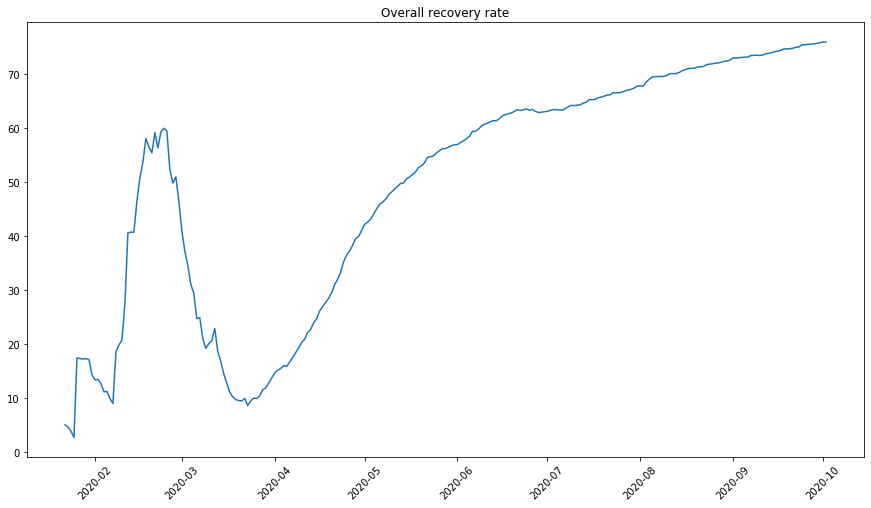

In [40]:
plt.figure(figsize = (15, 8))
sns.lineplot(dates, trend_recovery_rates)
plt.title("Overall recovery rate")
plt.xticks(rotation = 45)

## Countries with the lower recovery rates

In [41]:
df_compare = df.set_index("Country/Region")["10/2/20"]
df_compare = df_compare[df_compare > 0]
df_compare = df_compare.sort_values()
countries_higher_rr = df_compare[-13:].rename("Date")
countries_lower_rr = df_compare[:13].rename("Date")
countries_lower_rr

Country/Region
United Kingdom     0.508548
Netherlands        3.159215
Greece             6.962680
Belgium           15.713090
France            15.927560
Spain             19.036575
Hungary           22.175265
Botswana          22.383354
Tunisia           25.515947
Syria             26.346468
Burma             28.199678
Jamaica           31.503580
Tanzania          35.952849
Name: Date, dtype: float64

In [42]:
countries = list(countries_lower_rr.index)
holder = df.set_index("Country/Region").T[countries]
to_plot_lower_rr = holder[countries].reset_index()
to_plot_lower_rr = to_plot_lower_rr.rename({"index": "Date"}, axis = 1).set_index("Date")

(array([  3.,  11.,  19.,  27.,  35.,  43.,  51.,  59.,  67.,  75.,  83.,
         91.,  99., 107., 115., 123., 131., 139., 147., 155., 163., 171.,
        179., 187., 195., 203., 211., 219., 227., 235., 243., 251.]),
 <a list of 32 Text xticklabel objects>)

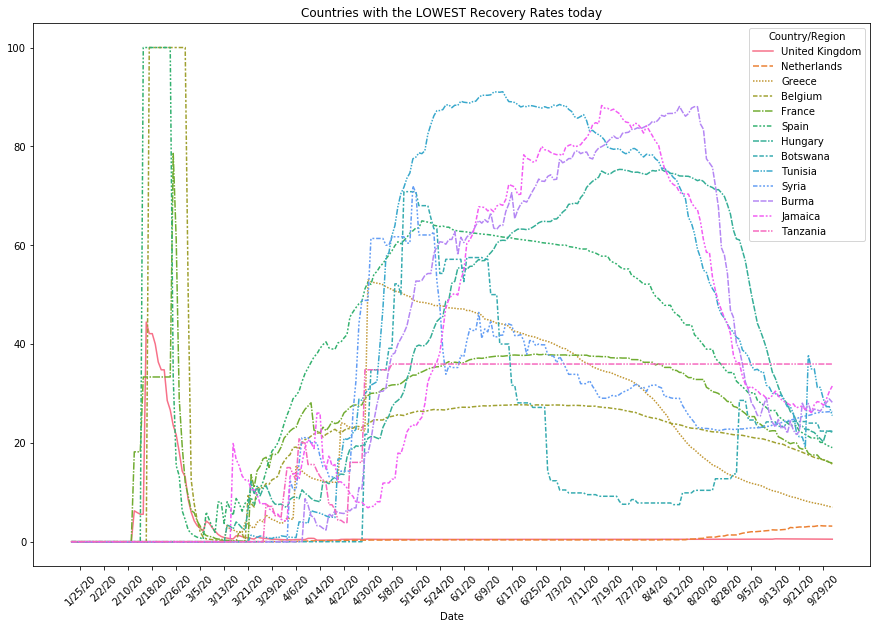

In [43]:
plt.figure(figsize = (15, 10))
fig = sns.lineplot(data = to_plot_lower_rr)
fig.set(xticks=to_plot_lower_rr.index[3::8])
plt.title("Countries with the LOWEST Recovery Rates today")
plt.xticks(rotation = 45)

## Countries with the higher recovery rates

In [44]:
countries = list(countries_higher_rr.index)
holder = df.set_index("Country/Region").T[countries]
to_plot_higher_rr = holder[countries].reset_index()
to_plot_higher_rr = to_plot_higher_rr.rename({"index": "Date"}, axis = 1).set_index("Date")

(array([  3.,  11.,  19.,  27.,  35.,  43.,  51.,  59.,  67.,  75.,  83.,
         91.,  99., 107., 115., 123., 131., 139., 147., 155., 163., 171.,
        179., 187., 195., 203., 211., 219., 227., 235., 243., 251.]),
 <a list of 32 Text xticklabel objects>)

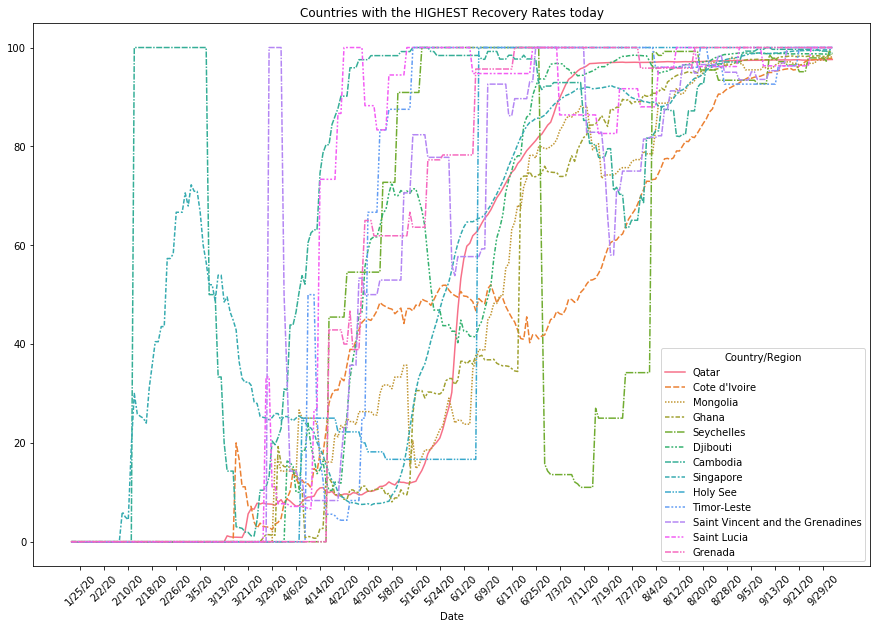

In [45]:
plt.figure(figsize = (15, 10))
fig = sns.lineplot(data = to_plot_higher_rr)
fig.set(xticks=to_plot_higher_rr.index[3::8])
plt.title("Countries with the HIGHEST Recovery Rates today")
plt.xticks(rotation = 45)